In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib


'''df = pd.read_csv("D:\envi mon and poll ctrl\soil_pol\soil_pollution_diseases.csv")
df.head()'''

'df = pd.read_csv("D:\\envi mon and poll ctrl\\soil_pol\\soil_pollution_diseases.csv")\ndf.head()'

In [11]:
print("SOIL POLLUTION CONTAMINATION DETAILS\n")
# First 5 rows
dfs = pd.read_csv("D:\envi mon and poll ctrl\soil_pol\soil_pollution_diseases.csv")
print(dfs.head())
print("\nSoil Pollution Contamination Info:")
dfs.info()
#Missing Values
print("Missing Values\n")
print("Missing Values in Soil Pollution Contamination:\n")
print(dfs.isnull().sum())
dfs.shape
dfs.columns

SOIL POLLUTION CONTAMINATION DETAILS

       Case_ID Date_Reported  Region   Country Pollutant_Type  \
0  CASE_100000    2024-09-12  Africa  Pakistan           Lead   
1  CASE_100001    2024-01-01  Africa   Germany           Lead   
2  CASE_100002    2025-02-24  Europe   Germany           Lead   
3  CASE_100003    2024-09-24    Asia       USA           Lead   
4  CASE_100004    2023-05-24  Africa     India       Chromium   

   Pollutant_Concentration_mg_kg  Soil_pH  Temperature_C  Humidity_%  \
0                          78.04     8.30           35.6        64.9   
1                          16.33     7.96           31.0        73.1   
2                         167.33     5.35           16.4        33.8   
3                          89.23     5.66           31.4        30.5   
4                          93.93     7.64           17.0        58.6   

   Rainfall_mm  ... Soil_Texture Soil_Organic_Matter_%  \
0         62.4  ...        Sandy                  1.98   
1          8.2  ...   

Index(['Case_ID', 'Date_Reported', 'Region', 'Country', 'Pollutant_Type',
       'Pollutant_Concentration_mg_kg', 'Soil_pH', 'Temperature_C',
       'Humidity_%', 'Rainfall_mm', 'Crop_Type', 'Farming_Practice',
       'Nearby_Industry', 'Water_Source_Type', 'Soil_Texture',
       'Soil_Organic_Matter_%', 'Disease_Type', 'Disease_Severity',
       'Health_Symptoms', 'Age_Group_Affected', 'Gender_Most_Affected',
       'Mitigation_Measure', 'Case_Resolved', 'Follow_Up_Required'],
      dtype='object')

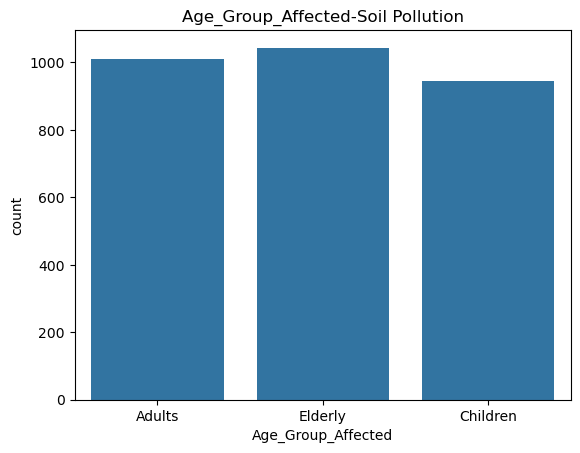

In [13]:
sns.countplot(x = 'Age_Group_Affected', data = dfs)
plt.title('Age_Group_Affected-Soil Pollution')
plt.show()

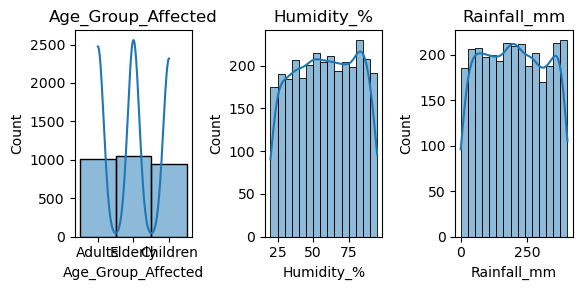

In [24]:
num_cols = ['Age_Group_Affected', 'Humidity_%', 'Rainfall_mm']
fig, axes = plt.subplots(1, 3, figsize=(6, 3))

for ax, col in zip(axes, num_cols):
    sns.histplot(dfs[col], kde=True, ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()


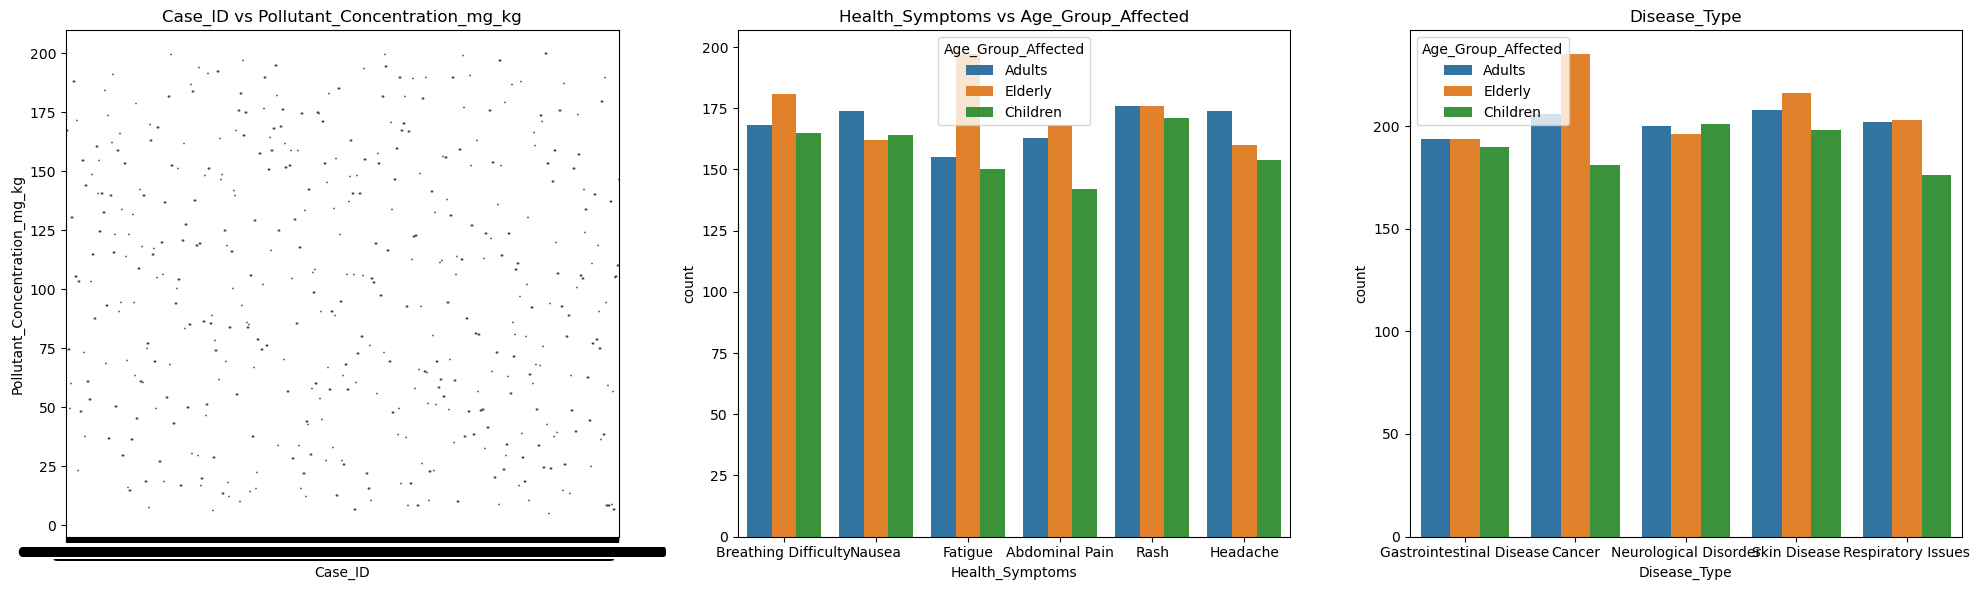

In [33]:
# Bivariate analysis
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='Case_ID', y='Pollutant_Concentration_mg_kg', data=dfs, ax=axes[0]) \
    .set_title('Case_ID vs Pollutant_Concentration_mg_kg')

sns.countplot(x='Health_Symptoms', hue='Age_Group_Affected', data=dfs, ax=axes[1]) \
    .set_title('Health_Symptoms vs Age_Group_Affected')

sns.countplot(x='Disease_Type', hue='Age_Group_Affected', data=dfs, ax=axes[2]) \
    .set_title('Disease_Type')

plt.tight_layout()
plt.show()


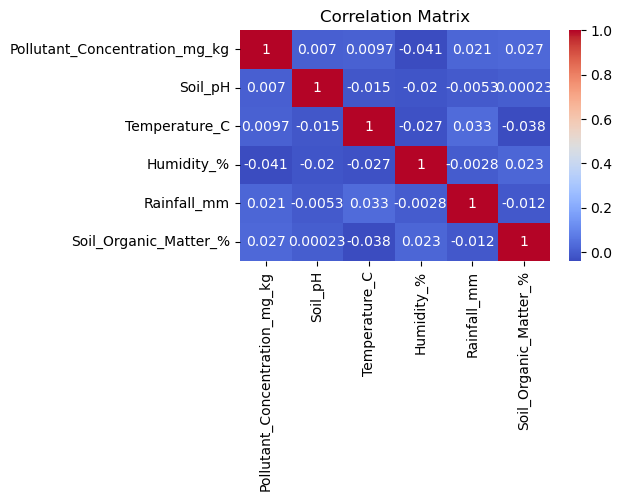

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = [col for col in dfs.columns if pd.api.types.is_numeric_dtype(dfs[col])]

plt.figure(figsize=(5, 3))
sns.heatmap(dfs[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


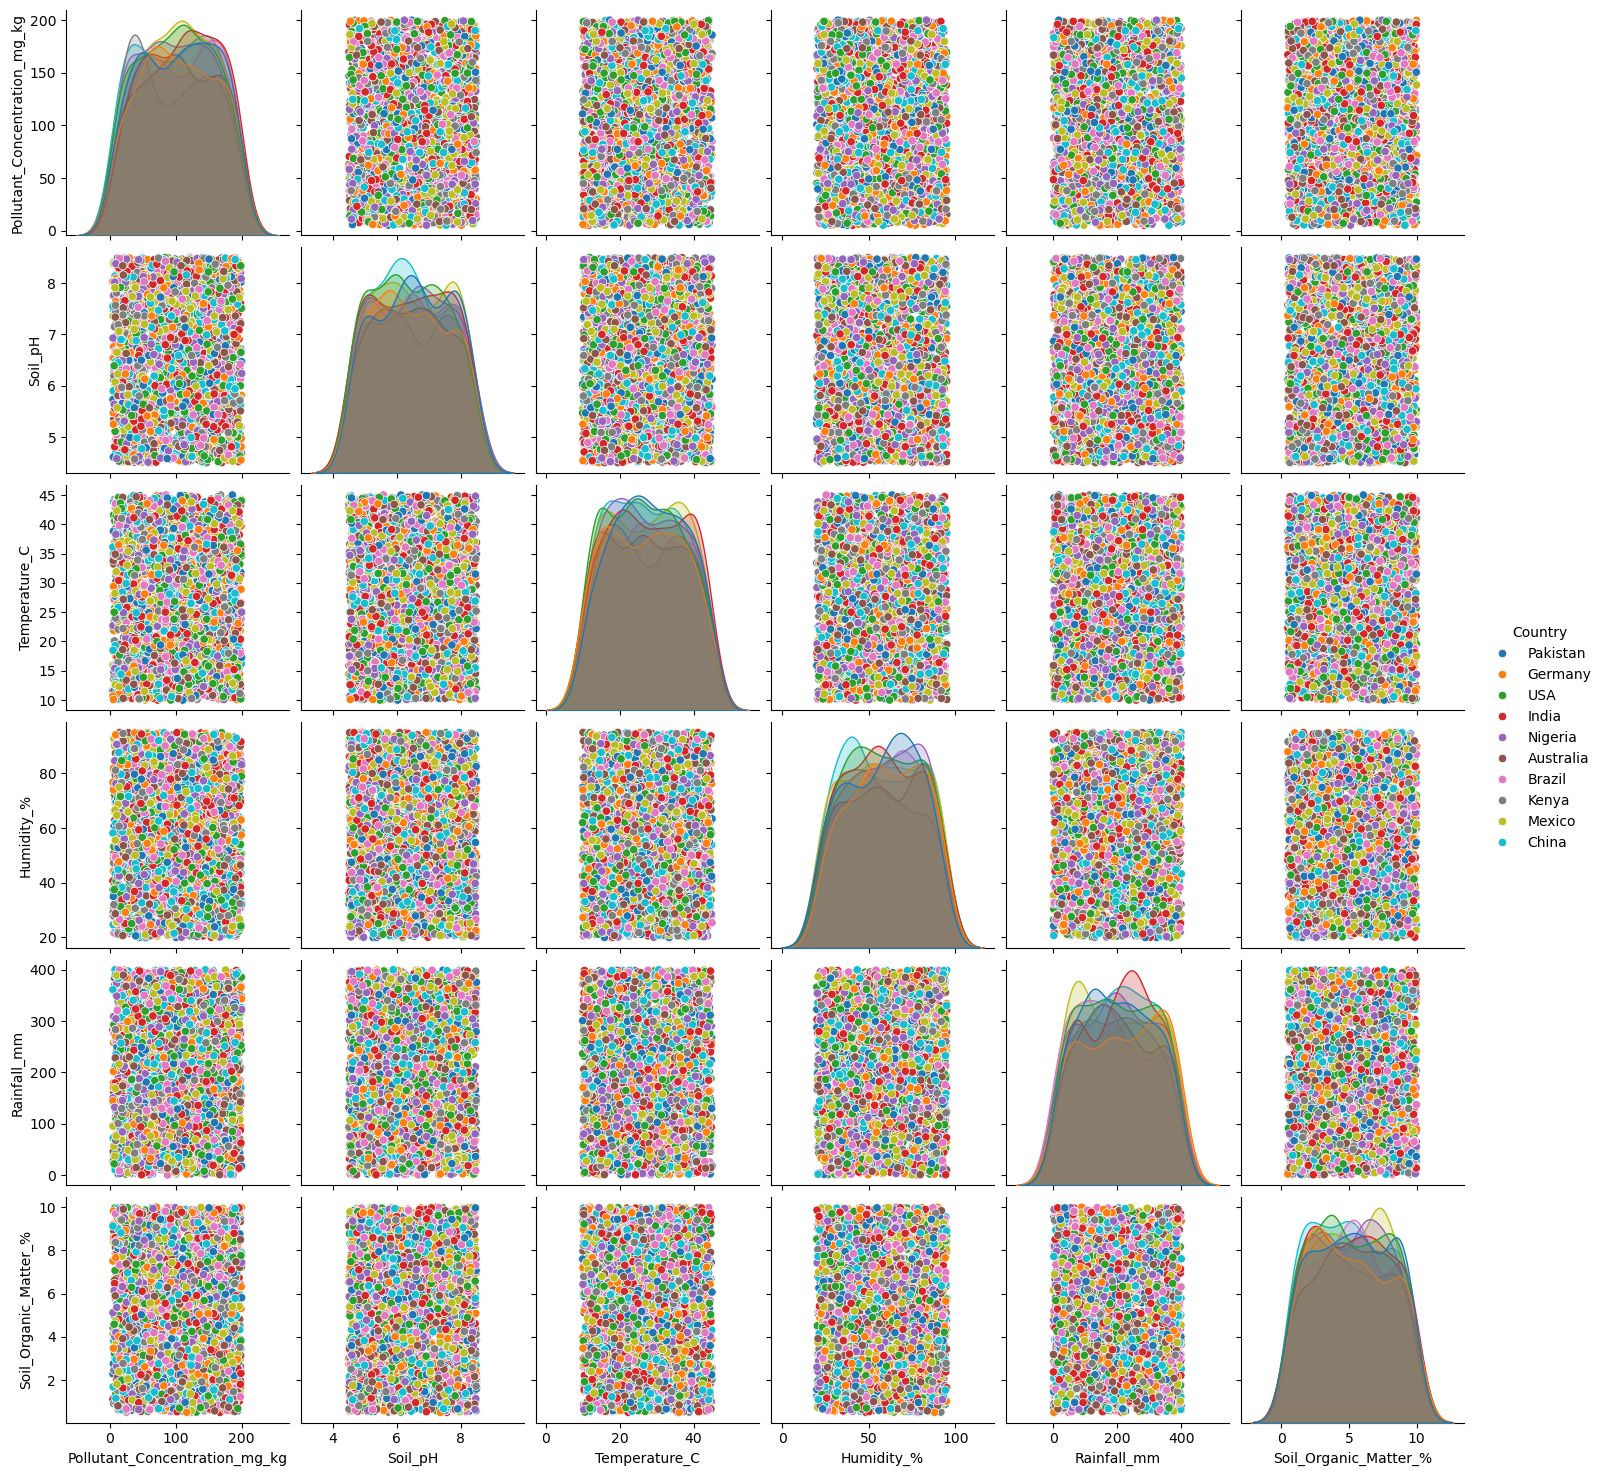

In [37]:
if 'Country' in dfs.columns:
    sns.pairplot(dfs, vars=num_cols, hue='Country')
    plt.show()
else:
    sns.pairplot(dfs, vars=num_cols)
    plt.show()

In [45]:
# =====================
# LAND POLLUTION MODEL
# =====================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("D:\envi mon and poll ctrl\soil_pol\soil_pollution_diseases.csv")

print("Available columns:", df.columns.tolist())

target_column = df.columns[-1]  
print(f"Using '{target_column}' as the target column")

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    if col != target_column:
        df[col] = le.fit_transform(df[col])

X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


Available columns: ['Case_ID', 'Date_Reported', 'Region', 'Country', 'Pollutant_Type', 'Pollutant_Concentration_mg_kg', 'Soil_pH', 'Temperature_C', 'Humidity_%', 'Rainfall_mm', 'Crop_Type', 'Farming_Practice', 'Nearby_Industry', 'Water_Source_Type', 'Soil_Texture', 'Soil_Organic_Matter_%', 'Disease_Type', 'Disease_Severity', 'Health_Symptoms', 'Age_Group_Affected', 'Gender_Most_Affected', 'Mitigation_Measure', 'Case_Resolved', 'Follow_Up_Required']
Using 'Follow_Up_Required' as the target column
              precision    recall  f1-score   support

          No       0.45      0.56      0.50       281
         Yes       0.50      0.39      0.44       319

    accuracy                           0.47       600
   macro avg       0.47      0.48      0.47       600
weighted avg       0.48      0.47      0.47       600



In [9]:
#WATER POLLUTION CONTAMINATION
import pandas as pd
import numpy as np
print("WATER POLLUTION CONTAMINATION DETAILS\n")
dfw = pd.read_csv("D:\envi mon and poll ctrl\water_pol\oil_spill.csv")
print(dfw.head())
print("\nWater Pollution Contamination Info:")
dfw.info()
print("Missing Values in Water Pollution:")
print(dfw.isnull().sum())
dfw.shape
dfw.columns

WATER POLLUTION CONTAMINATION DETAILS

   f_1    f_2      f_3     f_4  f_5       f_6    f_7   f_8      f_9  f_10  \
0    1   2558  1506.09  456.63   90   6395000  40.88  7.89  29780.0  0.19   
1    2  22325    79.11  841.03  180  55812500  51.11  1.21  61900.0  0.02   
2    3    115  1449.85  608.43   88    287500  40.42  7.34   3340.0  0.18   
3    4   1201  1562.53  295.65   66   3002500  42.40  7.97  18030.0  0.19   
4    5    312   950.27  440.86   37    780000  41.43  7.03   3350.0  0.17   

   ...     f_41      f_42     f_43     f_44   f_45  f_46      f_47   f_48  \
0  ...  2850.00   1000.00   763.16   135.46   3.73     0  33243.19  65.74   
1  ...  5750.00  11500.00  9593.48  1648.80   0.60     0  51572.04  65.73   
2  ...  1400.00    250.00   150.00    45.13   9.33     1  31692.84  65.81   
3  ...  6041.52    761.58   453.21   144.97  13.33     1  37696.21  65.67   
4  ...  1320.04    710.63   512.54   109.16   2.58     0  29038.17  65.66   

   f_49  target  
0  7.95       1  

Index(['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10',
       'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19',
       'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28',
       'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37',
       'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46',
       'f_47', 'f_48', 'f_49', 'target'],
      dtype='object')

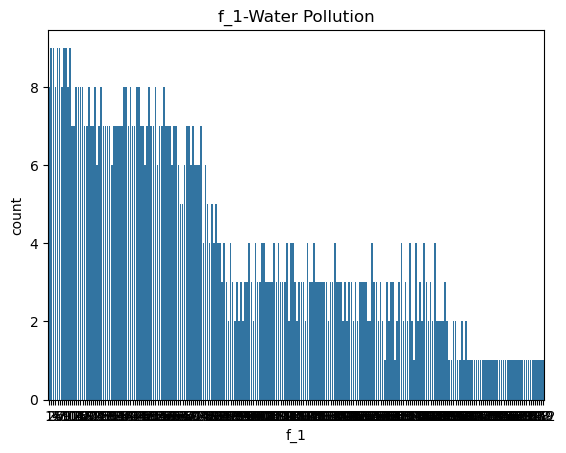

In [14]:
sns.countplot(x = 'f_1', data = dfw)
plt.title('f_1-Water Pollution')
plt.show()

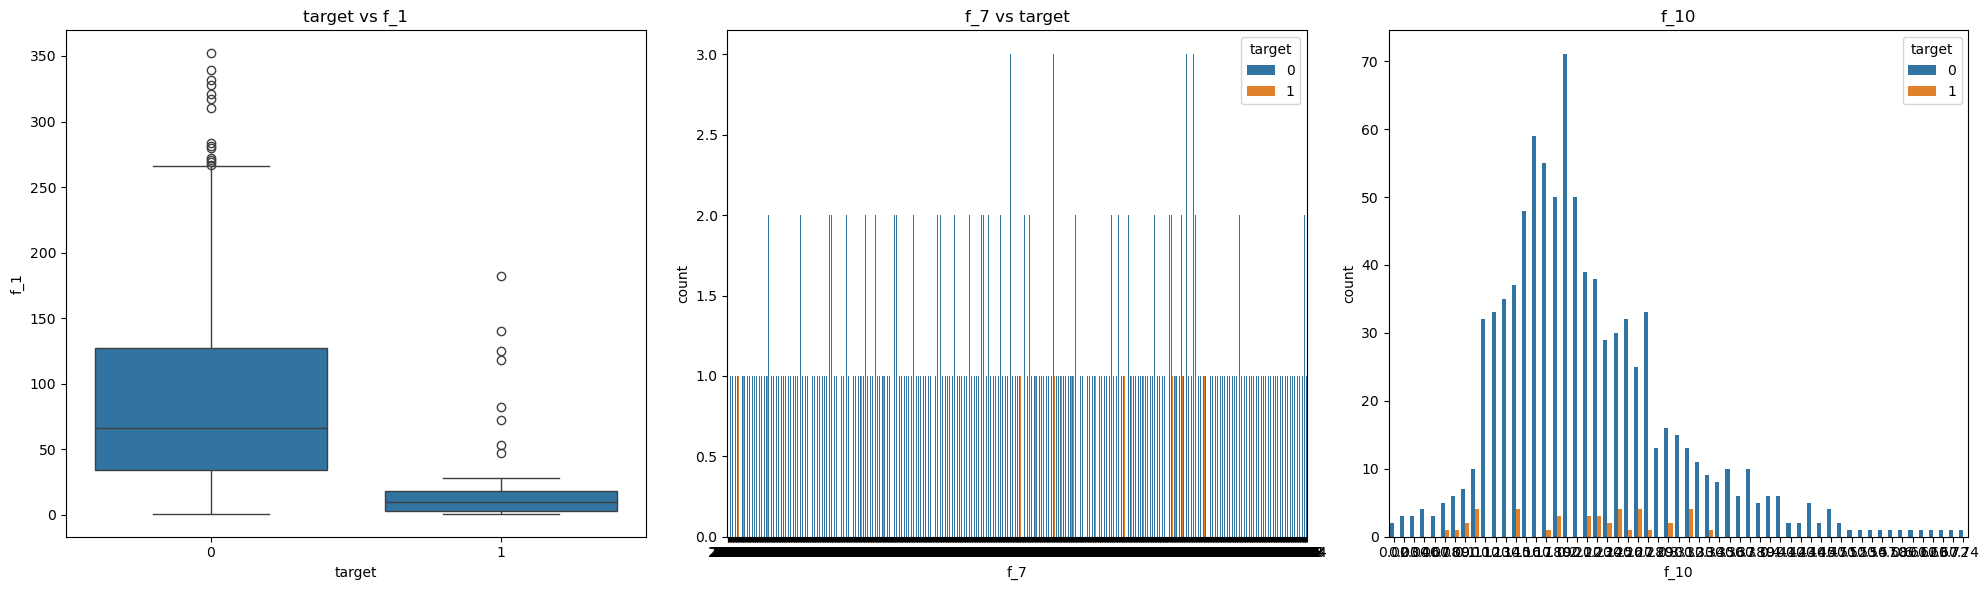

In [32]:
# Bivariate analysis
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.boxplot(x='target', y='f_1', data=dfw, ax=axes[0]) \
    .set_title('target vs f_1')

sns.countplot(x='f_7', hue='target', data=dfw, ax=axes[1]) \
    .set_title('f_7 vs target')

sns.countplot(x='f_10', hue='target', data=dfw, ax=axes[2]) \
    .set_title('f_10')

plt.tight_layout()
plt.show()

Available columns: ['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 'target']
Numerical columns: ['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 'target']


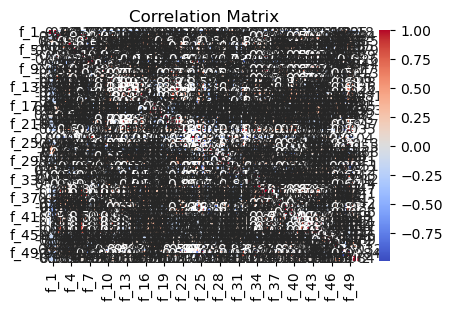

In [ ]:
print("Available columns:", dfw.columns.tolist())

num_cols = [col for col in dfw.columns if dfw[col].dtype in ['int64', 'float64']]
print("Numerical columns:", num_cols)

plt.figure(figsize=(5, 3))
sns.heatmap(dfw[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


if 'target' in dfw.columns:
    sns.pairplot(dfw, vars=num_cols, hue='target')
else:
    sns.pairplot(dfw, vars=num_cols)
plt.show()

In [46]:
# =====================
# WATER POLLUTION MODEL
# =====================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df = pd.read_csv("D:\envi mon and poll ctrl\water_pol\oil_spill.csv")

print("Available columns:", df.columns.tolist())

print(f"Using '{target_column}' as the target column")

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    if col != target_column:
        df[col] = le.fit_transform(df[col])

X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Available columns: ['f_1', 'f_2', 'f_3', 'f_4', 'f_5', 'f_6', 'f_7', 'f_8', 'f_9', 'f_10', 'f_11', 'f_12', 'f_13', 'f_14', 'f_15', 'f_16', 'f_17', 'f_18', 'f_19', 'f_20', 'f_21', 'f_22', 'f_23', 'f_24', 'f_25', 'f_26', 'f_27', 'f_28', 'f_29', 'f_30', 'f_31', 'f_32', 'f_33', 'f_34', 'f_35', 'f_36', 'f_37', 'f_38', 'f_39', 'f_40', 'f_41', 'f_42', 'f_43', 'f_44', 'f_45', 'f_46', 'f_47', 'f_48', 'f_49', 'target']
Using 'target' as the target column
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       182
           1       0.50      0.33      0.40         6

    accuracy                           0.97       188
   macro avg       0.74      0.66      0.69       188
weighted avg       0.96      0.97      0.96       188



In [31]:
#AIR POLLUTION CONTAMINATION
import pandas as pd
import numpy as np
df1 = pd.read_csv(r"D:\envi mon and poll ctrl\air_pol\Air Pollution Image Dataset\Air Pollution Image Dataset\Combined_Dataset\IND_and_Nep_AQI_Dataset1.csv")
df2 = pd.read_excel(r"D:\envi mon and poll ctrl\air_pol\Air Pollution Image Dataset\Air Pollution Image Dataset\Combined_Dataset\IND_and_Nep_AQI_Dataset.xlsx")
print("First dataset:")
print(df1.head())
print("\nSecond dataset:")
print(df2.head())
print("\nAir Pollution Contamination Info:")
df1.info()
df2.info()
#Missing Values 
print("Missing Values in Air Pollution:")
print(df1.isnull().sum())
print("\n")
print(df2.isnull().sum())
print("DF1\n")
df1.shape
df1.columns
print("DF2\n")
df2.shape
df2.columns

First dataset:
            Location                        Filename  Year  Month  Day   Hour  \
0  Biratnagar, Nepal  BRI_Un_2023-02-02- 12.00-9.jpg  2023      2    2  12:00   
1  Biratnagar, Nepal  BRI_Un_2023-02-02- 12.00-8.jpg  2023      2    2  12:00   
2  Biratnagar, Nepal  BRI_Un_2023-02-02- 12.00-7.jpg  2023      2    2  12:00   
3  Biratnagar, Nepal  BRI_Un_2023-02-02- 12.00-6.jpg  2023      2    2  12:00   
4  Biratnagar, Nepal  BRI_Un_2023-02-02- 12.00-5.jpg  2023      2    2  12:00   

   AQI  PM2.5    PM10     O3    CO  SO2   NO2    AQI_Class  
0  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
1  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
2  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
3  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  
4  158  70.08  100.82  58.89  0.49  4.4  1.04  d_Unhealthy  

Second dataset:
            Location                        Filename  Year  Month  Day  \
0  Biratnagar, Nepal  BRI_Un_2023-02-02- 

Index(['Location', 'Filename', 'Year', 'Month', 'Day', 'Hour', 'AQI', 'PM2.5',
       'PM10', 'O3', 'CO', 'SO2', 'NO2', 'AQI_Class'],
      dtype='object')

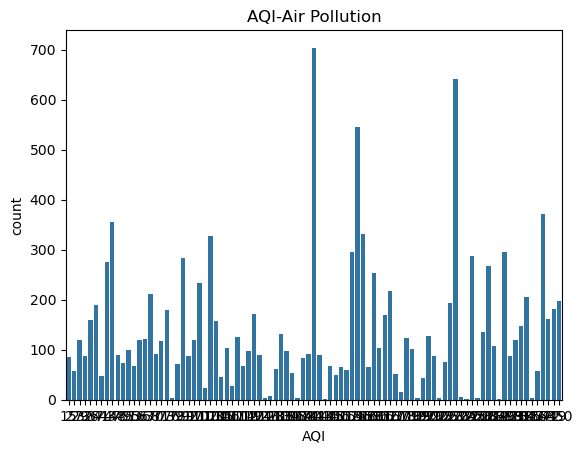

In [16]:
sns.countplot(x = 'AQI', data = df2)
plt.title('AQI-Air Pollution')
plt.show()

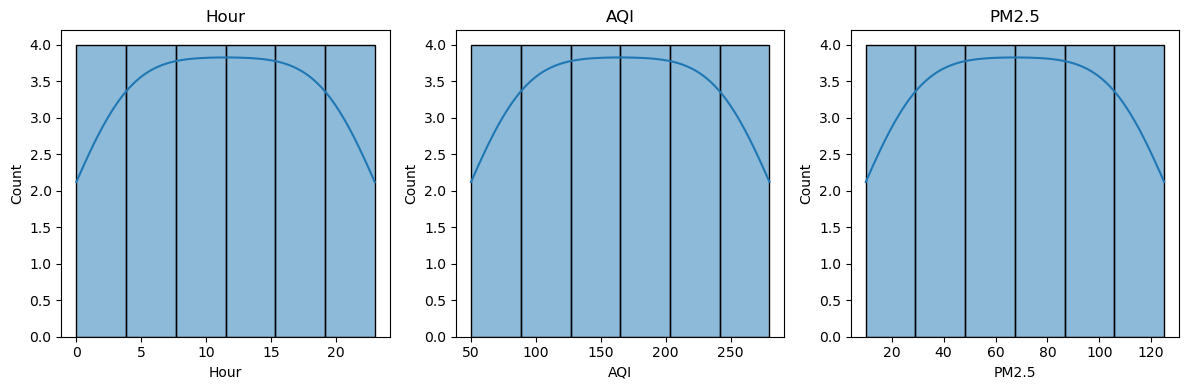

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df2 = pd.DataFrame({
    'Hour': range(24),
    'AQI': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 
            170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280],
    'PM2.5': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 
              70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125]
})

num_cols = ['Hour', 'AQI', 'PM2.5']
for col in num_cols:
    if col not in df2.columns:
        raise ValueError(f"Column {col} not found in dataframe")
   
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, col in zip(axes, num_cols):
    sns.histplot(data=df2, x=col, kde=True, ax=ax)  
    ax.set_title(col)
plt.tight_layout()
plt.show()


In [48]:
# =====================
# WATER POLLUTION MODEL
# =====================
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer  

def train_and_evaluate(dataset_path, target_col, model):
    # Load data
    if dataset_path.endswith('.csv'):
        df = pd.read_csv(dataset_path)
    else:
        df = pd.read_excel(dataset_path)
    
    num_imputer = SimpleImputer(strategy='mean')
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
    

    cat_cols = df.select_dtypes(include=['object']).columns
    if len(cat_cols) > 0:
        cat_imputer = SimpleImputer(strategy='most_frequent')
        df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
    

    le = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        if col != target_col:
            df[col] = le.fit_transform(df[col])


    X = df.drop(target_col, axis=1)
    y = df[target_col]

  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    num_cols = X.select_dtypes(include=['int64','float64']).columns
    scaler = StandardScaler()
    X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
    X_test[num_cols] = scaler.transform(X_test[num_cols])

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

# ------------------------
# Dataset 1
# ------------------------
dataset1_path = r"D:\envi mon and poll ctrl\air_pol\Air Pollution Image Dataset\Air Pollution Image Dataset\Combined_Dataset\IND_and_Nep_AQI_Dataset1.csv"
try:
    df1 = pd.read_csv(dataset1_path)
    print(f"Columns in Dataset 1: {df1.columns.tolist()}")
    train_and_evaluate(
        dataset_path=dataset1_path,
        target_col="AQI_Class",  
        model=RandomForestClassifier(n_estimators=100, random_state=42)
    )
except Exception as e:
    print(f"Error with Dataset 1: {e}")

# ------------------------
# Dataset 2
# ------------------------
train_and_evaluate(
    dataset_path=r"D:\envi mon and poll ctrl\air_pol\Air Pollution Image Dataset\Air Pollution Image Dataset\Combined_Dataset\IND_and_Nep_AQI_Dataset.xlsx",
    target_col="AQI_Class",
    model=GradientBoostingClassifier(random_state=42)
)

Columns in Dataset 1: ['Location', 'Filename', 'Year', 'Month', 'Day', 'Hour', 'AQI', 'PM2.5', 'PM10', 'O3', 'CO', 'SO2', 'NO2', 'AQI_Class']
                                  precision    recall  f1-score   support

                          a_Good       1.00      1.00      1.00       318
                      b_Moderate       1.00      1.00      1.00       321
c_Unhealthy_for_Sensitive_Groups       1.00      1.00      1.00       541
                     d_Unhealthy       1.00      1.00      1.00       536
                e_Very_Unhealthy       1.00      1.00      1.00       455
                        f_Severe       1.00      1.00      1.00       277

                        accuracy                           1.00      2448
                       macro avg       1.00      1.00      1.00      2448
                    weighted avg       1.00      1.00      1.00      2448

                                  precision    recall  f1-score   support

                          a_Good       1